# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

## TODO
1. some trajectories may not start on the boundaries. Remove those
2. some local transformations may fail. Check the validity of the first row after transformation

In [1]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"
# dataDir = "D:/AV/DataSetExploration/drone-dataset-tools/data/location-2/lab"

dataDir = "/home/office/AV/DataSetExploration/data/ind/location-2/csv"

In [2]:
exec(open('init_notebook.py').read())

current working dir/home/office/AV/DataSetExploration/TTI-dataset-tools/src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [101]:
sceneId = 22
date = "2022-12-22"
fps=5
minYDisplacement = 6.5
maxXDisplacement = 6
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))

In [102]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed'
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

In [103]:
pedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration
0,18,235,18001,22,9.0,8.845965,4.485159,1.263405,0.572902,-0.230607,0.419307
1,18,240,18001,22,9.0,8.590706,4.402693,1.276295,0.412328,-0.064447,0.802866
2,18,245,18001,22,9.0,8.330737,4.355752,1.299848,0.234706,-0.117765,0.888114
3,18,250,18001,22,9.0,8.061950,4.335745,1.343936,0.100036,-0.220440,0.673346
4,18,255,18001,22,9.0,7.781109,4.330627,1.404200,0.025591,-0.301324,0.372225


In [104]:
# print(pedDf["uniqueTrackId"].unique())

In [105]:
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
count,1889.000000,1889.000000,1889.000000,1889.0,1889.0,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000,1889.000000
mean,22.781366,17674.205929,23091.046056,22.0,9.0,1.699804,0.523120,0.011575,0.185709,0.031454,-0.035970,1.342359,3.368856,3.299329
std,3.731785,9666.829949,3834.693705,0.0,0.0,4.379595,2.877905,0.973017,1.029172,0.420670,0.363037,0.487562,3.235228,2.700359
min,18.000000,151.000000,18001.000000,22.0,9.0,-6.918586,-4.668876,-2.318874,-2.266289,-2.570607,-1.982749,0.014320,0.000000,0.000000
25%,20.000000,11694.000000,20256.000000,22.0,9.0,-1.876306,-2.200573,-0.886524,-0.815767,-0.181372,-0.216504,1.192692,0.666495,0.986646
50%,22.000000,17927.000000,22014.000000,22.0,9.0,1.587515,0.920470,0.060641,0.255410,0.029314,-0.040293,1.427889,2.444808,2.453055
75%,26.000000,25477.000000,26116.000000,22.0,9.0,5.080854,3.260796,0.808050,1.094024,0.236231,0.125832,1.637245,4.999532,5.526633
max,29.000000,31956.000000,29600.000000,22.0,9.0,9.825033,4.672356,2.192736,3.482821,2.001175,1.923488,3.516988,14.899091,9.154517


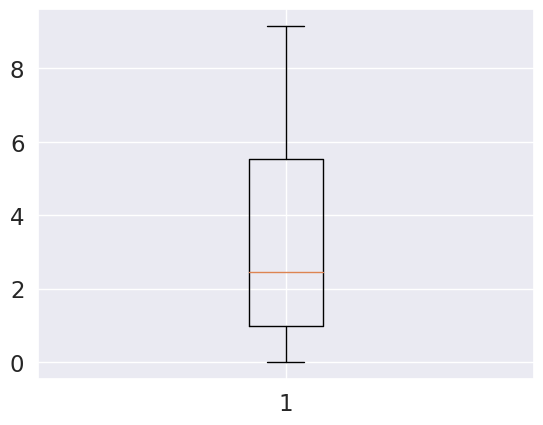

{'whiskers': [<matplotlib.lines.Line2D at 0x7f008178ad60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f008179a2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f008178abe0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f008179a820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f008179aac0>],
 'means': []}

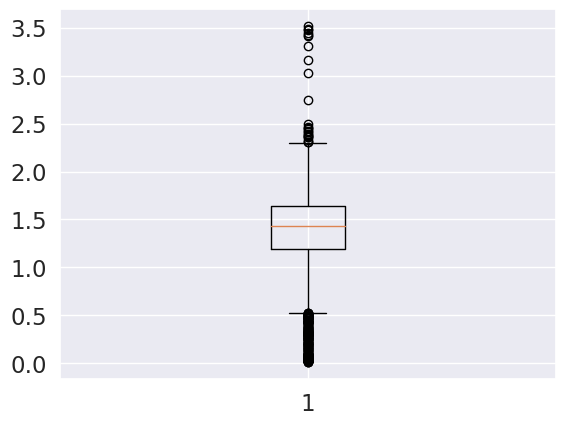

In [106]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

In [107]:
# outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=True, returnVals=True)
# outliers.index

In [108]:
# outliers = cleaner.getOutliersBySpeed(pedDf, byIQR=False, returnVals=True)
# outliers

In [13]:
# outliers = cleaner.getOutliersByYDisplacement(pedDf, byIQR=False, returnVals=True)
# outliers

In [14]:
# ped19019 = pedDf[pedDf["uniqueTrackId"] == 19019]
# firstRow = ped19019.iloc[0]
# firstRow

In [15]:
# dX, dY = transformer.translateOneToLocalSource(ped19019)
# print(list(zip(dX, dY)))

In [16]:
# ped19019.tail()

In [17]:
# print(len(outliers), 'vs', len(pedDf["uniqueTrackId"].unique()))

In [18]:
# outliers = cleaner.getOutliersByXDisplacement(pedDf, byIQR=False, returnVals=True)
# outliers

In [19]:
# cleanPedDf = cleaner.cleanBySpeed(pedDf, byIQR=True)
# cleanPedDf2 = cleaner.cleanBySpeed(pedDf, byIQR=False)
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(cleanPedDf2, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

using min Y displacement (6.5)


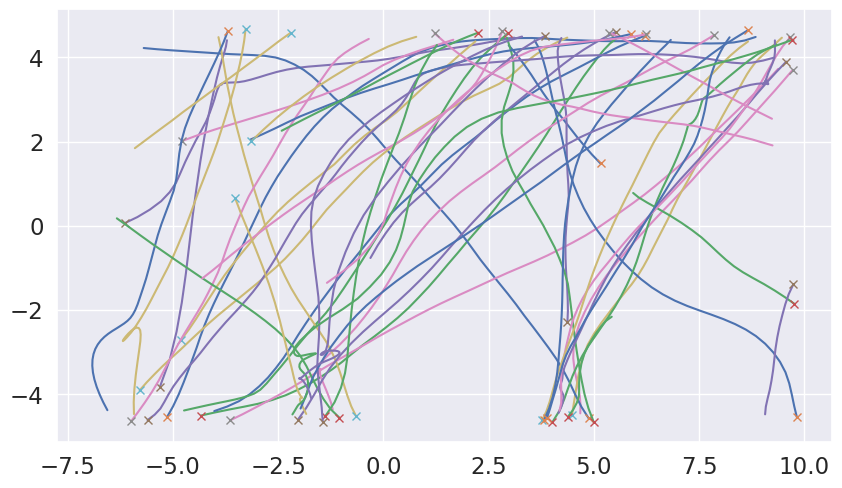

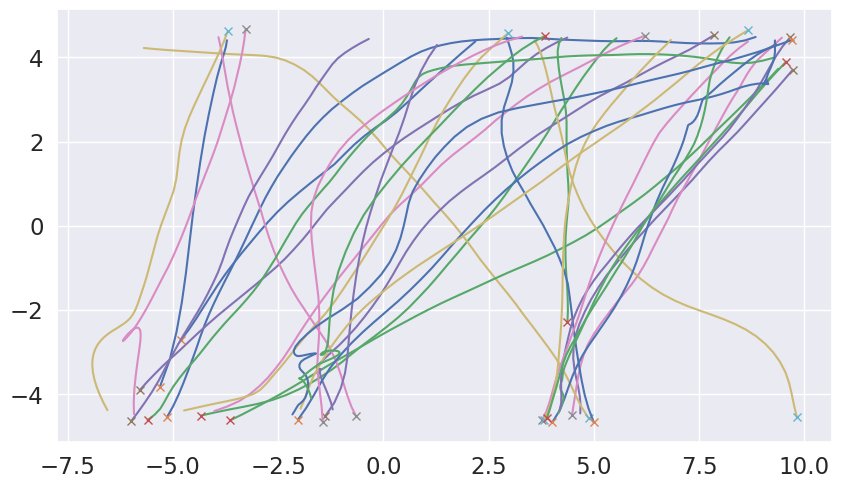

In [109]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY', trackIds=[19019])
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

In [110]:
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())

In [111]:
transformer.translateAllToLocalSource(cleanPedDf)

In [112]:
cleanPedDf.head()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
0,18,235,18001,22,9.0,8.845965,4.485159,1.263405,0.572902,-0.230607,0.419307,1.387231,0.000000,0.000000,0.000000,0.000000
1,18,240,18001,22,9.0,8.590706,4.402693,1.276295,0.412328,-0.064447,0.802866,1.341247,0.255259,0.082466,-0.255259,-0.082466
2,18,245,18001,22,9.0,8.330737,4.355752,1.299848,0.234706,-0.117765,0.888114,1.320867,0.515228,0.129407,-0.515228,-0.129407
3,18,250,18001,22,9.0,8.061950,4.335745,1.343936,0.100036,-0.220440,0.673346,1.347654,0.784016,0.149414,-0.784016,-0.149414
4,18,255,18001,22,9.0,7.781109,4.330627,1.404200,0.025591,-0.301324,0.372225,1.404433,1.064856,0.154532,-1.064856,-0.154532


In [24]:
# trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"]==allPedIds[0]]
# visualizer.show(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
# transformer.rotate(trackDf)
# visualizer.show(trackDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [25]:
tracksMeta.head()

,uniqueTrackId,initialFrame,finalFrame,numFrames,class,horizontalDirection,verticalDirection
0,18334,22293,22378,18,pedestrian,WEST,SOUTH
1,19019,1130,1330,41,pedestrian,EAST,SOUTH
2,19093,5725,5860,28,pedestrian,EAST,SOUTH
3,19232,16651,16751,21,pedestrian,WEST,NORTH
4,19302,21219,21329,23,pedestrian,EAST,SOUTH


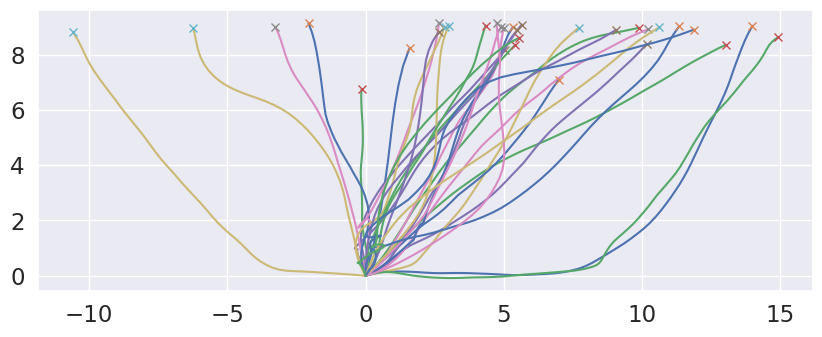

In [113]:
southIds = []
for pedId in allPedIds:
    trackDf = cleanPedDf[cleanPedDf["uniqueTrackId"] == pedId]
    trackMeta = tracksMeta[tracksMeta["uniqueTrackId"] == pedId].iloc[0]
    # print(trackMeta['verticalDirection'])
    if trackMeta['verticalDirection'] == "SOUTH":
        southIds.append(pedId)
        # print(trackMeta["uniqueTrackId"])
        X, Y = transformer.rotate180(trackDf)
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localX'] = X
        cleanPedDf.loc[cleanPedDf["uniqueTrackId"] == pedId, 'localY'] = Y

visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

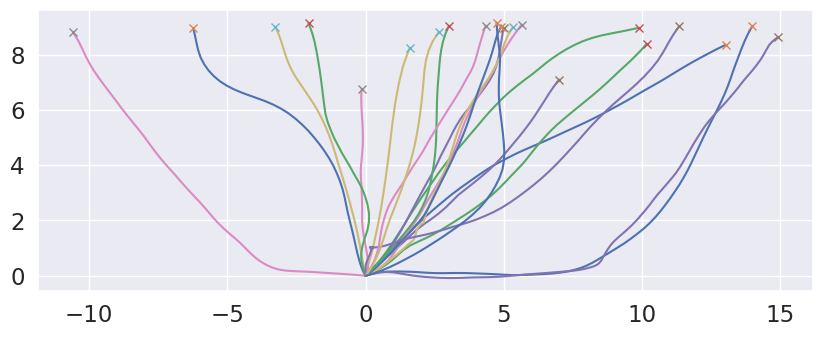

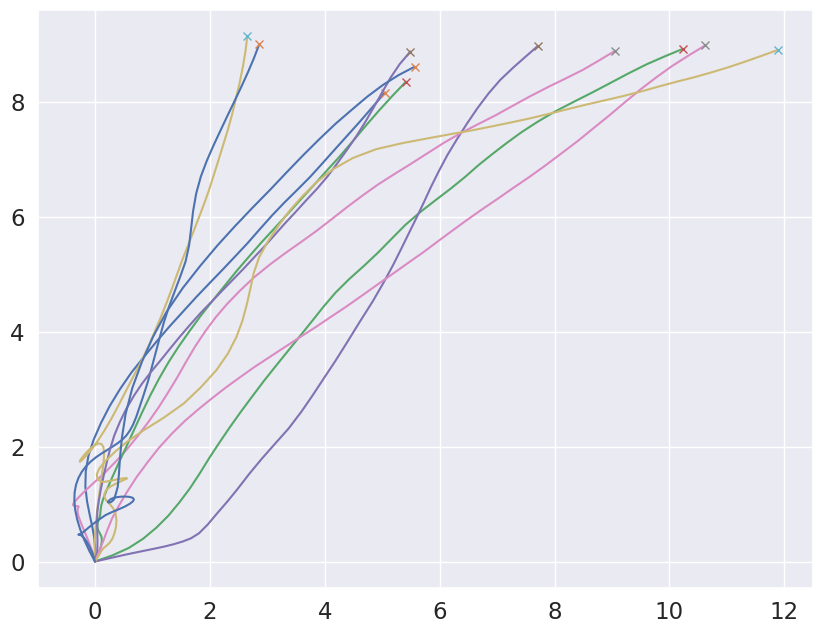

In [114]:
southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

In [28]:
cleanPedDf[cleanPedDf["uniqueTrackId"] == southIds[0]].head(10)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
18,19,1130,19019,31,6.0,1.747113,2.889699,-0.797745,0.923351,-0.055835,-0.066258,1.220235,0.000000,0.000000,-0.000000,-0.000000
19,19,1135,19019,31,6.0,1.896894,2.709257,-0.748903,0.902210,-0.244210,0.105705,1.172535,0.149781,0.180442,-0.149781,0.180442
20,19,1140,19019,31,6.0,2.037677,2.532843,-0.703915,0.882071,-0.224944,0.100695,1.128514,0.290564,0.356856,-0.290564,0.356856
21,19,1145,19019,31,6.0,2.175308,2.355577,-0.688159,0.886326,-0.078777,-0.021278,1.122113,0.428195,0.534121,-0.428195,0.534121
22,19,1150,19019,31,6.0,2.305595,2.183941,-0.651432,0.858182,-0.183634,0.140721,1.077423,0.558482,0.705758,-0.558482,0.705758
23,19,1155,19019,31,6.0,2.425775,2.014234,-0.600903,0.848536,-0.252648,0.048230,1.039758,0.678662,0.875465,-0.678662,0.875465
24,19,1160,19019,31,6.0,2.539099,1.838825,-0.566620,0.877047,-0.171415,-0.142555,1.044160,0.791986,1.050874,-0.791986,1.050874
25,19,1165,19019,31,6.0,2.639597,1.662878,-0.502490,0.879734,-0.320647,-0.013434,1.013128,0.892484,1.226821,-0.892484,1.226821
26,19,1170,19019,31,6.0,2.729088,1.485365,-0.447452,0.887562,-0.275193,-0.039144,0.993972,0.981975,1.404333,-0.981975,1.404333
27,19,1175,19019,31,6.0,2.812534,1.305477,-0.417232,0.899444,-0.151098,-0.059406,0.991505,1.065421,1.584222,-1.065421,1.584222


In [29]:
startingDf = cleanPedDf[cleanPedDf["displacementY"] < 1]

In [30]:
startingDf.head(10)

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY,localX,localY
18,19,1130,19019,31,6.0,1.747113,2.889699,-0.797745,0.923351,-0.055835,-0.066258,1.220235,0.000000,0.000000,-0.000000,-0.000000
19,19,1135,19019,31,6.0,1.896894,2.709257,-0.748903,0.902210,-0.244210,0.105705,1.172535,0.149781,0.180442,-0.149781,0.180442
20,19,1140,19019,31,6.0,2.037677,2.532843,-0.703915,0.882071,-0.224944,0.100695,1.128514,0.290564,0.356856,-0.290564,0.356856
21,19,1145,19019,31,6.0,2.175308,2.355577,-0.688159,0.886326,-0.078777,-0.021278,1.122113,0.428195,0.534121,-0.428195,0.534121
22,19,1150,19019,31,6.0,2.305595,2.183941,-0.651432,0.858182,-0.183634,0.140721,1.077423,0.558482,0.705758,-0.558482,0.705758
23,19,1155,19019,31,6.0,2.425775,2.014234,-0.600903,0.848536,-0.252648,0.048230,1.039758,0.678662,0.875465,-0.678662,0.875465
59,19,5725,19093,31,6.0,-3.700989,2.820415,-0.444987,0.912855,0.003279,-0.379050,1.015538,0.000000,0.000000,-0.000000,-0.000000
60,19,5730,19093,31,6.0,-3.609928,2.628404,-0.455303,0.960056,0.051577,-0.236009,1.062548,0.091061,0.192011,-0.091061,0.192011
61,19,5735,19093,31,6.0,-3.517382,2.425482,-0.462732,1.014612,0.037147,-0.272779,1.115150,0.183607,0.394934,-0.183607,0.394934
62,19,5740,19093,31,6.0,-3.429185,2.213539,-0.440987,1.059713,-0.108726,-0.225502,1.147807,0.271804,0.606876,-0.271804,0.606876


In [31]:
startingDf[["uniqueTrackId", "frame"]].groupby(["uniqueTrackId"]).count()

,frame
uniqueTrackId,
19019,6
19093,5
19232,4
19302,4
21328,5
22016,6
22101,4
23077,4
23205,5


In [32]:
startingDf[["uniqueTrackId", "frame"]]

,uniqueTrackId,frame
18,19019,1130
19,19019,1135
20,19019,1140
21,19019,1145
22,19019,1150
...,...,...
433,26169,7383
461,29431,22336
462,29431,22341
463,29431,22346


# Analyzers

In [33]:
import seaborn as sns
from tti_dataset_tools.InfluenceAnalyzer import InfluenceAnalyzer
influenceAnz = InfluenceAnalyzer(colMapper)

In [162]:
dfH = influenceAnz.getInfluenceHeatMap(southPeds, (20,10))

/home/office/AV/DataSetExploration/TTI-dataset-tools/src/tti_dataset_tools/InfluenceAnalyzer.py:117: RuntimeWarning: divide by zero encountered in log
  grid[i+w // 2, j] for i, j in product(X, Y)
/home/office/AV/DataSetExploration/TTI-dataset-tools/src/tti_dataset_tools/InfluenceAnalyzer.py:130: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


In [163]:
# plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
# sns.set(font_scale=1.5)

# ax = sns.heatmap(dfH,
#             cmap='icefire',
#             xticklabels=100,
#             yticklabels=10)

# plt.xlabel('X',fontsize=22)
# plt.ylabel('Y',fontsize=22)
# ax.invert_yaxis()

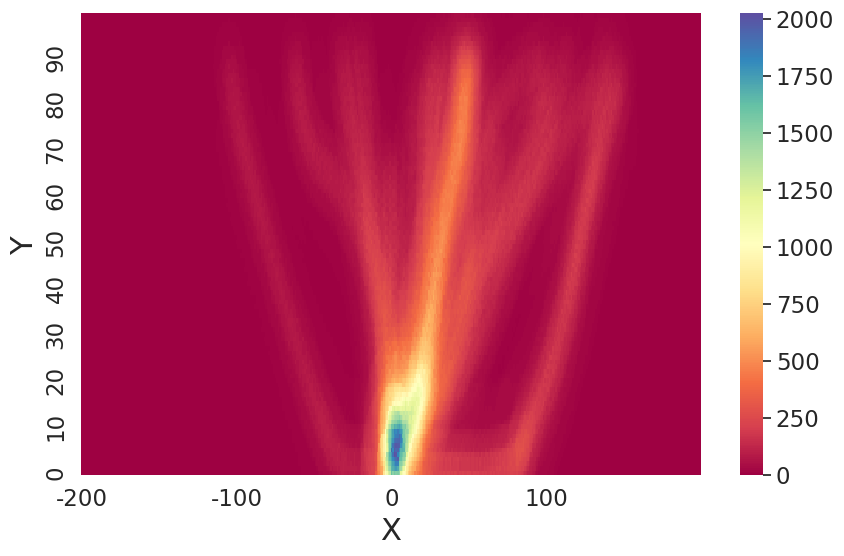

In [164]:
plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

ax = sns.heatmap(dfH,
            cmap='Spectral',
            xticklabels=100,
            yticklabels=10)

plt.xlabel('X',fontsize=22)
plt.ylabel('Y',fontsize=22)
ax.invert_yaxis()

/home/office/AV/DataSetExploration/TTI-dataset-tools/src/tti_dataset_tools/InfluenceAnalyzer.py:130: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.


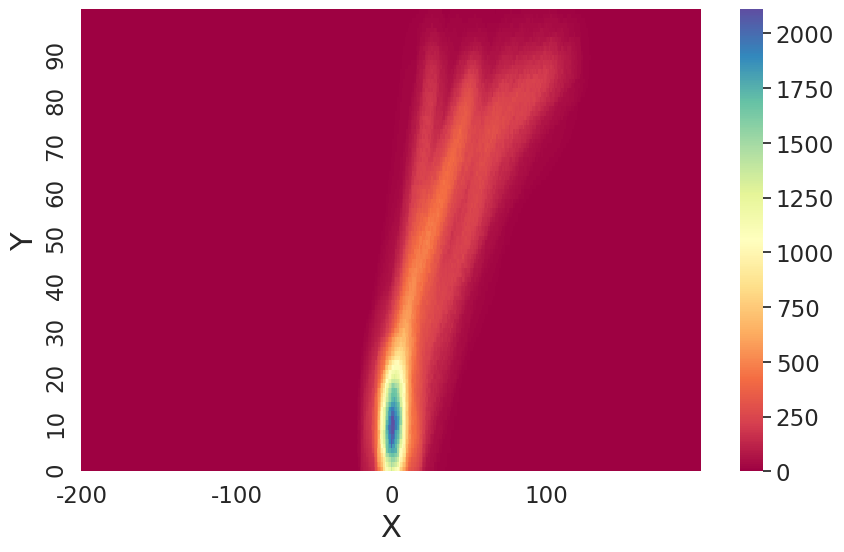

In [158]:
dfH = influenceAnz.getInfluenceHeatMap(northPeds, (20,10))
plt.figure(figsize=(10, 6), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)

ax = sns.heatmap(dfH,
            cmap='Spectral',
            xticklabels=100,
            yticklabels=10)

plt.xlabel('X',fontsize=22)
plt.ylabel('Y',fontsize=22)
ax.invert_yaxis()